In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Tendency**

In [2]:
df = pd.read_csv("Data_Sets\\Sleep_health_and_lifestyle_dataset.csv")
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## **Percentiles**

### Percentile: the value below which a percentage of data falls.

#### Example: Find the 30% percentile for sleeping hours

In [3]:
# we use percentile() function from Numpy to find percentile
sleep = df["Sleep Duration"]
sleep_percentile30 = np.percentile(sleep, 30)
sleep_percentile30

6.5

That means 30% of people sleep less than 6.5 hours

## **Standard Deviation and Variance**

### The Standard Deviation is a measure of how spread out numbers are.

$$
s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2} 
$$
The formula: it is the square root of the Variance.

### The Variance is the average of the squared differences from the Mean

To calculate the variance follow these steps:

- Work out the Mean (the simple average of the numbers)
- Then for each number: subtract the Mean and square the result (the squared difference).
- Then work out the average of those squared differences.

In [4]:
# We can use the std() function from Numpy to find the standard deviation
std = np.std(df[["Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]], axis = 0)
std

Sleep Duration                0.794592
Quality of Sleep              1.195355
Physical Activity Level      20.802936
Stress Level                  1.772152
Heart Rate                    4.130143
Daily Steps                1615.751242
dtype: float64

In [5]:
# We can use the var() function from Numpy to find the variance
var = np.var(df[["Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]], axis = 0)
var

Sleep Duration             6.313769e-01
Quality of Sleep           1.428873e+00
Physical Activity Level    4.327622e+02
Stress Level               3.140524e+00
Heart Rate                 1.705808e+01
Daily Steps                2.610652e+06
dtype: float64

## **Correlation**

### Correlation measures the relationship between two variables.

- Correlation is Positive when the values increase together  
- Correlation is Negative when one value decreases as the other increases

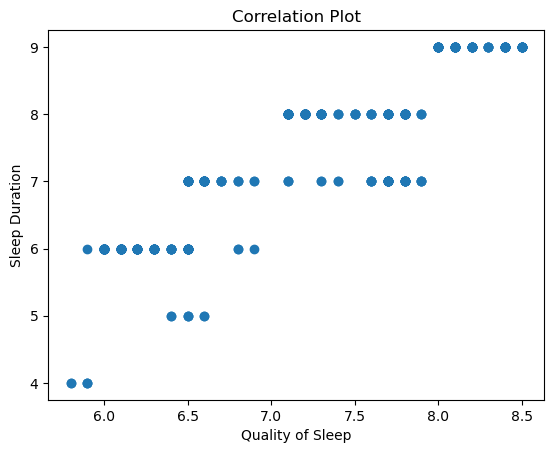

In [6]:
# Let's see a correlation between Sleep Duration and Stress Level
Sleep_Duration = df["Sleep Duration"]
Quality_of_Sleep = df["Quality of Sleep"]

plt.xlabel("Quality of Sleep")
plt.ylabel("Sleep Duration")
plt.scatter(Sleep_Duration, Quality_of_Sleep)
plt.title('Correlation Plot')
plt.show()

#### Normal sleeping time is 7-8 hours  
#### The plot proves that the closer the duration of sleep aligns with the normal sleeping time, the better individuals tend to feel better

### Correlation Coefficient  
The correlation coefficient measures the relationship between two variables.  
The correlation coefficient can never be less than -1 or higher than 1.  
- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation

In [7]:
# We have corrcoef() function in Numpy to calculate correlation coefficiency
sleep_corrcof = np.corrcoef(Sleep_Duration, Quality_of_Sleep)
sleep_corrcof

array([[1.      , 0.883213],
       [0.883213, 1.      ]])

That shows that there is High positive correlation between Sleep Duration and Quality of sleep

## **Correlation Matrix**

### A correlation matrix is simply a table showing the correlation coefficients between variables.

In [8]:
# Here is an correlation matrix of dataset
corr_matrix = df[['Age','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].corr()
corr_matrix

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


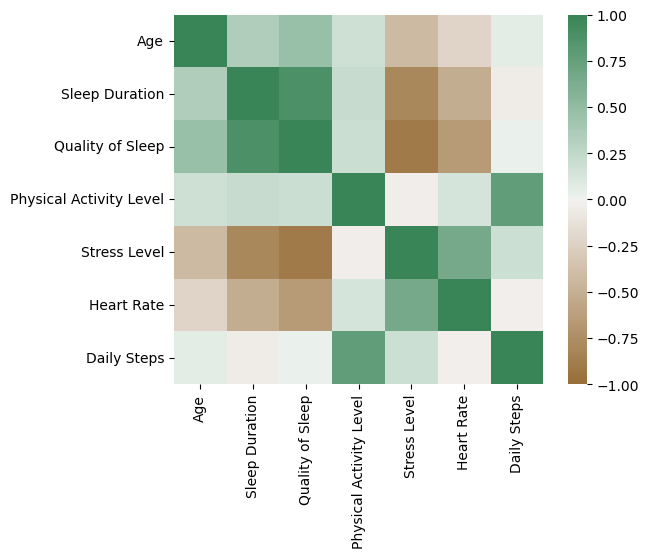

In [9]:
# Or we can visialize correlation matrix with seaborn heatmap
correlation_full_health = df[['Age','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].corr()

axis_corr = sns.heatmap(correlation_full_health, vmin=-1, vmax=1, center=0, square=True, cmap=sns.diverging_palette(50, 500, n=500))
plt.show()

## **Correlation vs Causality**

### Correlation Does Not Imply Causality

#### Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. A correlation between variables, however, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable.  
#### Causation indicates that one event is the result of the occurrence of the other event; i.e. there is a causal relationship between the two events. This is also referred to as cause and effect.



### Example: Correlation between Stress level and Heart Rate

High stress levels can be caused by a variety of factors: 
- Work-related stress
- Personal relationships
- Financial problems
- Health issues  
Good heart rate does not imply low stress level, they have close correlation.  

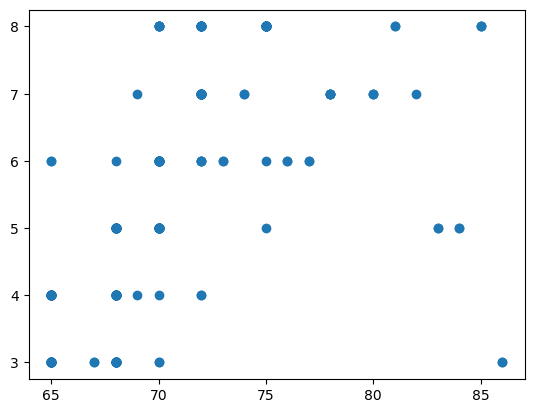

In [16]:
stress_level = df["Stress Level"]
heart_rate = df["Heart Rate"]

plt.scatter(heart_rate, stress_level)
plt.show()